Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Read Dataset and Display it

In [36]:
import pandas as pd
Calories_dataset=pd.read_csv("D:\AI\DataScience\CaloriesBurnt\calories.csv")
print(Calories_dataset)


        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0        

Prepsocessing

Check If Nan Values Exist

In [37]:
print(Calories_dataset.isnull().sum())  # Shows count of NaN per column

# OR check if there are ANY NaN values in whole dataframe
print("Any NaN values?:",Calories_dataset.isnull().values.any())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64
Any NaN values?: False


Drop User_ID because it doesn’t affect calorie prediction,
and this will prevent overfitting



In [38]:
Calories_dataset = Calories_dataset.drop('User_ID',axis=1)  
print(Calories_dataset)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0        male   68   190.0    94.0      29.0       105.0       40.8     231.0
1      female   20   166.0    60.0      14.0        94.0       40.3      66.0
2        male   69   179.0    79.0       5.0        88.0       38.7      26.0
3      female   34   179.0    71.0      13.0       100.0       40.5      71.0
4      female   27   154.0    58.0      10.0        81.0       39.8      35.0
...       ...  ...     ...     ...       ...         ...        ...       ...
14995  female   20   193.0    86.0      11.0        92.0       40.4      45.0
14996  female   27   165.0    65.0       6.0        85.0       39.2      23.0
14997  female   43   159.0    58.0      16.0        90.0       40.1      75.0
14998    male   78   193.0    97.0       2.0        84.0       38.3      11.0
14999    male   63   173.0    79.0      18.0        92.0       40.5      98.0

[15000 rows x 8 columns]


One-Hot Encoding = Turning Categories into Vectors
We represent each category as a vector of 0s and 1s.

Example:

css
Copy
Edit
Gender → Male, Female

Male   → [1, 0]
Female → [0, 1]

In [41]:
if 'Gender' in Calories_dataset.columns:
    Calories_dataset= pd.get_dummies(Calories_dataset, columns=['Gender'], drop_first=True)
    
else:
    print("Gender column not found, skipping encoding.")
print("After Hot Encoding")
print(Calories_dataset)


Gender column not found, skipping encoding.
After Hot Encoding
       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
0       68   190.0    94.0      29.0       105.0       40.8     231.0   
1       20   166.0    60.0      14.0        94.0       40.3      66.0   
2       69   179.0    79.0       5.0        88.0       38.7      26.0   
3       34   179.0    71.0      13.0       100.0       40.5      71.0   
4       27   154.0    58.0      10.0        81.0       39.8      35.0   
...    ...     ...     ...       ...         ...        ...       ...   
14995   20   193.0    86.0      11.0        92.0       40.4      45.0   
14996   27   165.0    65.0       6.0        85.0       39.2      23.0   
14997   43   159.0    58.0      16.0        90.0       40.1      75.0   
14998   78   193.0    97.0       2.0        84.0       38.3      11.0   
14999   63   173.0    79.0      18.0        92.0       40.5      98.0   

       Gender_male  
0                1  
1                0

 Split features & target(calories)

In [43]:
X= Calories_dataset.drop('Calories',axis=1)
y= Calories_dataset['Calories']

 Split into Train (70%), Validation (15%), Test (15%)

In [44]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Standarization Scaling

In [51]:
scaler = StandardScaler()             # Create scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training and transform
X_val_scaled = scaler.transform(X_val)          # Transform validation set
X_test_scaled = scaler.transform(X_test)        # Transform test set

Train Linear Regression Model

In [52]:
model = LinearRegression()        # Create model instance
model.fit(X_train_scaled, y_train)  # Train model on training data
y_val_pred = model.predict(X_val_scaled)  # Predictions for validation

Evaluate Model On Validation

In [53]:
val_mse = mean_squared_error(y_val, y_val_pred)  # Mean Squared Error
val_r2 = r2_score(y_val, y_val_pred)            # R² Score
print(f"\nValidation MSE: {val_mse:.2f}")
print(f"Validation R²: {val_r2:.3f}")


Validation MSE: 129.43
Validation R²: 0.967


Evaluate Model on Test Dataset

In [54]:
y_test_pred = model.predict(X_test_scaled)   # Predictions on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"\nTest MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.3f}")


Test MSE: 136.40
Test R²: 0.966


Check Model Coeff

In [55]:
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:\n", coefficients)


Feature Coefficients:
              Coefficient
Age             8.460986
Height         -2.532620
Weight          4.461420
Duration       55.191797
Heart_Rate     18.966810
Body_Temp     -13.240901
Gender_male    -0.676440


Visualization

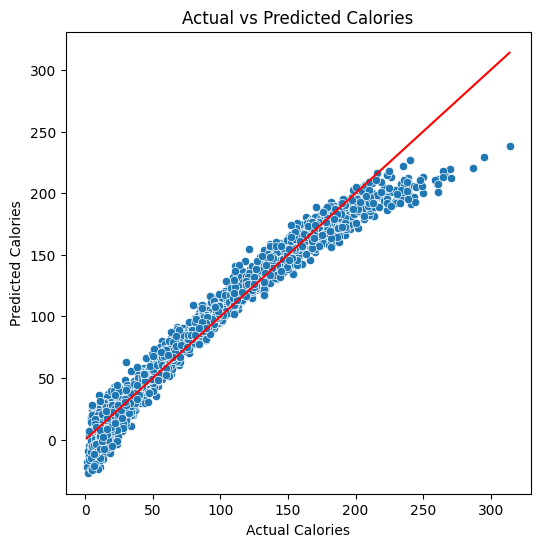

In [56]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal line
plt.show()

Save Model and Scalar

In [58]:
joblib.dump(model, "linear_calories_model.pkl")   # Save trained model
joblib.dump(scaler, "scaler.pkl")                 # Save scaler
print("Model and Scaler saved!")

Model and Scaler saved!
